In [111]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np
from scipy.stats import mannwhitneyu
from scipy.stats import shapiro

In [112]:
%matplotlib inline

In [113]:
pd.options.display.max_columns = 37  # nr max de colunas exibidas

In [114]:
# open csv file
arquivo_csv = 'dados_5-6m.csv'

original = pd.read_csv(arquivo_csv, ';')

In [115]:
df = original.copy()

In [116]:
#linhas e colunas
df.shape

(142, 16)

In [117]:
#TRATAMENTO DOS DADOS

In [118]:
# apenas palmeiras com altura entre 3 e 4 m
df = df[df['Altura Palmeira (m)'] == 6]

In [119]:
#drop all the columns where all the data is empty
df = df.dropna(how='all', axis='columns')

In [120]:
#Remove unnamed columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [121]:
df.shape

(142, 16)

In [122]:
df.head()

,Data,Palmeira,Altura Palmeira (m),Área,Quadrante,Número,Família,Gênero,Espécie,Altura (cm),Dap (mm),Coletada,Nativa,Estágio sucessional,Obs,Identificação
0,7/2/2020,6,6,Copa,1,4763.0,Sapindaceae,Cupania,Cupania oblongifolia,22.0,"3,47",S,S,Secundária Inicial,NaN,OK
1,7/2/2020,6,6,Copa,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7/2/2020,6,6,Copa,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7/2/2020,6,6,Copa,4,4765.0,Meliaceae,Guarea,Guarea macrophylla,27.0,"4,43",N,S,Secundária Inicial,NaN,OK
4,7/2/2020,6,6,Copa,4,4767.0,Sapindaceae,Cupania,Cupania oblongifolia,20.0,3,S,S,Secundária Inicial,NaN,OK


In [123]:
#tipos de dados das colunas
print(df.dtypes)

Data                    object
Palmeira                 int64
Altura Palmeira (m)      int64
Área                    object
Quadrante                int64
Número                 float64
Família                 object
Gênero                  object
Espécie                 object
Altura (cm)            float64
Dap (mm)                object
Coletada                object
Nativa                  object
Estágio sucessional     object
Obs                     object
Identificação           object
dtype: object


In [124]:
#Ajustando os tipos de dados

df['Estágio sucessional'] = df['Estágio sucessional'].astype(str)
df['Nativa'] = df['Nativa'].astype(str)
df['Espécie'] = df['Espécie'].astype(str)
df['Gênero'] = df['Gênero'].astype(str)
df['Família'] = df['Família'].astype(str)
df['Quadrante'] = df['Quadrante'].astype(str)
df['Área'] = df['Área'].astype('category')
df['Altura Palmeira (m)'] = df['Altura Palmeira (m)'].astype(str)
df['Palmeira'] = df['Palmeira'].astype(str)
df['Dap (mm)'] = df['Dap (mm)'].astype(str)

#troca , por . no na coluna dap
df['Dap (mm)'] = df['Dap (mm)'].apply(lambda x: x.replace(',', '.'))
df['Dap (mm)'] = df['Dap (mm)'].astype('float64')



In [125]:
#tipos de dados ajustados
print(df.dtypes)

Data                     object
Palmeira                 object
Altura Palmeira (m)      object
Área                   category
Quadrante                object
Número                  float64
Família                  object
Gênero                   object
Espécie                  object
Altura (cm)             float64
Dap (mm)                float64
Coletada                 object
Nativa                   object
Estágio sucessional      object
Obs                      object
Identificação            object
dtype: object


In [126]:
df.head()

,Data,Palmeira,Altura Palmeira (m),Área,Quadrante,Número,Família,Gênero,Espécie,Altura (cm),Dap (mm),Coletada,Nativa,Estágio sucessional,Obs,Identificação
0,7/2/2020,6,6,Copa,1,4763.0,Sapindaceae,Cupania,Cupania oblongifolia,22.0,3.47,S,S,Secundária Inicial,NaN,OK
1,7/2/2020,6,6,Copa,2,NaN,nan,nan,nan,NaN,NaN,NaN,nan,nan,NaN,NaN
2,7/2/2020,6,6,Copa,3,NaN,nan,nan,nan,NaN,NaN,NaN,nan,nan,NaN,NaN
3,7/2/2020,6,6,Copa,4,4765.0,Meliaceae,Guarea,Guarea macrophylla,27.0,4.43,N,S,Secundária Inicial,NaN,OK
4,7/2/2020,6,6,Copa,4,4767.0,Sapindaceae,Cupania,Cupania oblongifolia,20.0,3.00,S,S,Secundária Inicial,NaN,OK


In [127]:
#new shape
df.shape

(142, 16)

In [128]:
#Ajuste valores ausentes nas colunas Estágio Sucessional e Nativa 
df['Estágio sucessional'] =  df['Estágio sucessional'].apply(lambda x: x.replace('nan', 'indeterminado'))
df['Estágio sucessional'] =  df['Estágio sucessional'].fillna('indeterminado')
df['Nativa'] =  df['Nativa'].apply(lambda x: x.replace('nan', 'indeterminado'))
df['Nativa'] =  df['Nativa'].fillna('indeterminado')

In [129]:
#Ajustar Area externa para 'Entorno'
df['Área'] =  df['Área'].apply(lambda x: x.replace('Externo', 'Entorno'))

In [130]:
#Remove decimal do nome da palmeira e da altura da palmeira 
df['Palmeira'] = df['Palmeira'].apply(lambda x: x.split('.')[0]) 
df['Altura Palmeira (m)'] = df['Altura Palmeira (m)'].apply(lambda x: x.split('.')[0]) 

In [131]:
#contar registros em cada grupo em estudo
df['Área'].value_counts()

Entorno    98
Copa       44
Name: Área, dtype: int64

In [132]:
#Dataframe com quadrantes sem plantas (df_with_nan)
df_with_nan= df.copy()
#df_with_nan['Número'] =  df_with_nan['Número'].fillna(0)
df_with_nan['Área'].value_counts()

Entorno    98
Copa       44
Name: Área, dtype: int64

In [133]:
#quantidade de individuos nas parcelas da copa
copa_with_nan = df_with_nan[df_with_nan['Área'] == 'Copa']
abundancia_copa = copa_with_nan.groupby(['Palmeira','Quadrante'])['Número'].count() 
abundancia_copa

Palmeira  Quadrante
10        1            0
          2            1
          3            4
          4            1
6         1            1
          2            0
          3            0
          4            2
7         1            2
          2            2
          3            2
          4            4
8         1            3
          2            5
          3            3
          4            3
9         1            2
          2            2
          3            2
          4            2
Name: Número, dtype: int64

In [134]:
#Percentual de individuos sob as copas
total_parcelas_copa = abundancia_copa.count()
copa_0_2 = (abundancia_copa[abundancia_copa < 3 ].count() / total_parcelas_copa) * 100
copa_3_5 = (abundancia_copa[abundancia_copa[(abundancia_copa >= 3) & (abundancia_copa <6)]].count()/ total_parcelas_copa) * 100
copa_6_8 = (abundancia_copa[abundancia_copa[(abundancia_copa > 6) ]].count() / total_parcelas_copa) * 100
dados_copa = [copa_0_2,copa_3_5,copa_6_8]

Text(0.5,0,'Quantidade de regenerantes nas parcelas sob as copas')

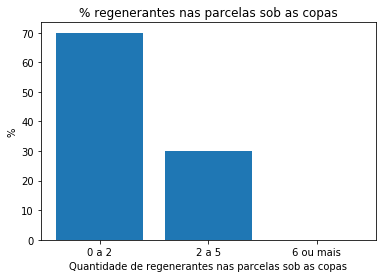

In [135]:
legendas = ['0 a 2', '2 a 5', '6 ou mais']
dados = dados_copa

ax = plt.figure().gca()
ax.bar(legendas,dados)
plt.title ("% regenerantes nas parcelas sob as copas")
plt.ylabel("%")
plt.xlabel("Quantidade de regenerantes nas parcelas sob as copas")


In [136]:
#quantidade de individuos nas parcelas no entorno
entorno_with_nan = df_with_nan[df_with_nan['Área'] == 'Entorno']
abundancia_entorno = entorno_with_nan.groupby(['Palmeira','Quadrante'])['Número'].count() 
abundancia_entorno

Palmeira  Quadrante
10        1             3
          2             5
          3             3
          4             3
6         1             5
          2             6
          3             4
          4             5
7         1            10
          2             3
          3             7
          4             6
8         1             3
          2             9
          3             7
          4             3
9         1             3
          2             6
          3             6
          4             0
Name: Número, dtype: int64

In [137]:
#Percentual de invidiviudos nas parcelas do entorno
total_parcelas_entorno = abundancia_entorno.count()
entorno_0_2 = (abundancia_entorno[abundancia_entorno < 3 ].count() / total_parcelas_entorno) * 100
entorno_3_5 = (abundancia_entorno[abundancia_entorno[(abundancia_entorno >= 3) & (abundancia_entorno <6)]].count() / total_parcelas_entorno) * 100
entorno_6_14 =(abundancia_entorno[abundancia_entorno[(abundancia_entorno >= 6) ]].count() / total_parcelas_entorno) * 100
dados_entorno = [entorno_0_2,entorno_3_5,entorno_6_14]

Text(0.5,0,'Quantidade de regenerantes nas parcelas do entorno')

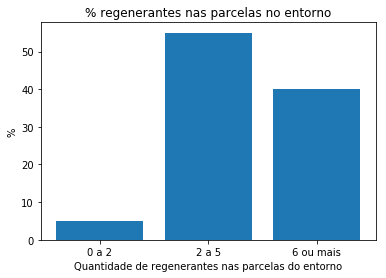

In [138]:
legendas = ['0 a 2', '2 a 5', '6 ou mais']
dados = dados_entorno

ax = plt.figure().gca()
ax.bar(legendas,dados)
plt.title ("% regenerantes nas parcelas no entorno")
plt.ylabel("%")
plt.xlabel("Quantidade de regenerantes nas parcelas do entorno")


In [139]:
#TESTES ESTATISTICOS DE NORMALIDADE E DISTRIBUIÇÃO DAS ALTURAS E DIAMETROS

# 1 - Shapiro-Wilk Test (teste de normalidade) para os dados da copa
stat, p = shapiro(abundancia_copa)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# resultado
alpha = 0.05
if p > alpha:
	print('Grupo COPA tem distribuição normal (aceita H0)')
else:
	print('Grupo COPA não tem distribuição normal (rejeita H0)')


Statistics=0.929, p=0.146
Grupo COPA tem distribuição normal (aceita H0)


In [140]:
# 2 - Shapiro-Wilk Test (teste de normalidade) para os dados do entorno
stat, p = shapiro(abundancia_entorno)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# resultado
alpha = 0.05
if p > alpha:
    print('Grupo ENTORNO tem distribuição normal (aceita H0)')
else:
    print('Grupo ENTORNO não tem distribuição normal (rejeita H0)')

Statistics=0.936, p=0.203
Grupo ENTORNO tem distribuição normal (aceita H0)


In [141]:
# 3 - Mann-Whitney test (dados com distribuicao nao normal)
stat, p = mannwhitneyu(abundancia_copa, abundancia_entorno)
print('Statistics=%.3f, p=%.3f' % (stat, p))

#  resultado

alpha = 0.05

if p > alpha:
	print('Mesma distribuição (aceita H0)')
else:
	print('Diferentes distribuiçoes (rejeita H0), ou seja, existem diferenças significativas entre as duas condicoes')

Statistics=53.500, p=0.000
Diferentes distribuiçoes (rejeita H0), ou seja, existem diferenças significativas entre as duas condicoes


In [142]:
#Dataframe sem quadrantes e numeros nulos (df_without_nan)
df_without_nan = df.copy()
df_without_nan.dropna(subset=[ 'Número'], inplace=True)
df_without_nan['Área'].value_counts()

Entorno    97
Copa       41
Name: Área, dtype: int64

In [143]:
#contar registros em cada coluna - área da copa
df_without_nan[df_without_nan['Área'] == 'Copa'].count()

Data                   41
Palmeira               41
Altura Palmeira (m)    41
Área                   41
Quadrante              41
Número                 41
Família                41
Gênero                 41
Espécie                41
Altura (cm)            41
Dap (mm)               41
Coletada               41
Nativa                 41
Estágio sucessional    41
Obs                     2
Identificação           5
dtype: int64

In [144]:
#contar registros em cada coluna - área do entorno
df_without_nan[df_without_nan['Área'] == 'Entorno'].count()

Data                   97
Palmeira               97
Altura Palmeira (m)    97
Área                   97
Quadrante              97
Número                 97
Família                97
Gênero                 97
Espécie                97
Altura (cm)            97
Dap (mm)               97
Coletada               97
Nativa                 97
Estágio sucessional    97
Obs                    15
Identificação          19
dtype: int64

Text(0,0.5,'Número de indivíduos')

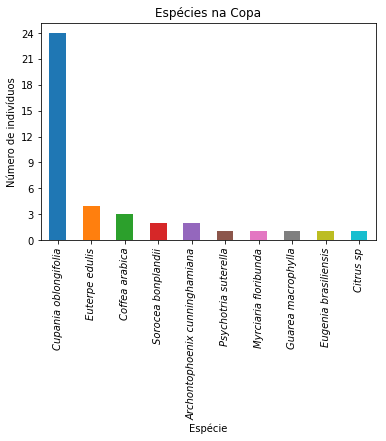

In [145]:
#Gráfico de barras da area das especies da area da copa ordenadas de forma descendente
plot_copa = df_without_nan[df_without_nan['Área'] == 'Copa']
plot_copa =  plot_copa[~plot_copa['Espécie'].isin(['Pendente'] )]
plot_copa = plot_copa.groupby('Espécie')['Número'].count() 
plot_copa = plot_copa[plot_copa > 0]
plot_copa = plot_copa.sort_values(ascending = False)

ax = plt.figure().gca()
ax = plot_copa.plot.bar()
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.xticks(fontstyle='italic')
plt.title ("Espécies na Copa")
plt.ylabel("Número de indivíduos")

Text(0,0.5,'Número de indivíduos')

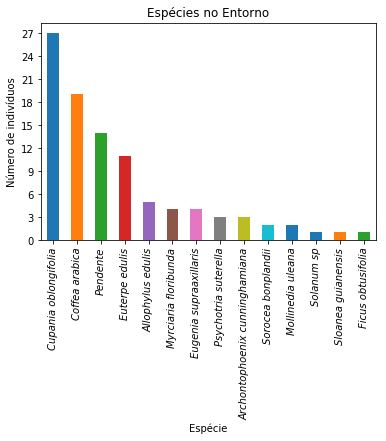

In [146]:
#Gráfico de barras da area das especies da area do entorno ordenadas de forma descendente
plot_entorno = df_without_nan[['Área','Espécie','Número']]
plot_entorno= plot_entorno[plot_entorno['Área'] == 'Entorno']
plot_entorno = plot_entorno.groupby('Espécie')['Número'].count()
plot_entorno = plot_entorno[ plot_entorno > 0 ]
plot_entorno = plot_entorno.sort_values(ascending = False)

ax = plt.figure().gca()
ax = plot_entorno.plot.bar()
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.xticks(fontstyle='italic')
plt.title ("Espécies no Entorno")
plt.ylabel("Número de indivíduos")

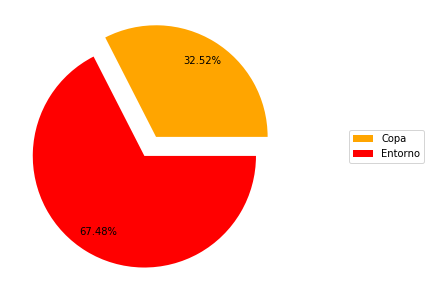

In [147]:
#Percentual de indivíduos arbóreos regenerantes sob a copa de palmeiras Livistona chinensis de 3 m de altura e no entorno delas.

regenerantes_por_area = df_without_nan[~df_without_nan['Espécie'].isin(['Pendente'] )]
regenerantes_por_area = regenerantes_por_area.groupby('Área', as_index=False)['Número'].count() 
regenerantes_por_area = regenerantes_por_area[regenerantes_por_area > 0]
regenerantes_por_area = regenerantes_por_area.dropna()

labels = regenerantes_por_area['Área'].tolist()

sizes =  regenerantes_por_area['Número'].tolist()

explode = [0.1, 0.1]

colors = ['#FFA500', '#FF0000']

fig, ax = plt.subplots(figsize=(5, 5))
ax.axis('equal')

pie = ax.pie(sizes, explode=explode, colors=colors,
             autopct='%1.2f%%', pctdistance =0.80,textprops=dict(color="black"))

plt.legend(pie[0], labels, bbox_to_anchor=(1.5,0.5), loc="right")

plt.show()

/home/tania/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


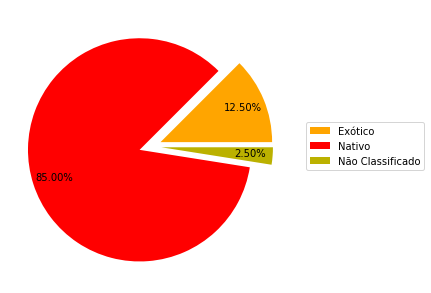

In [148]:
#Proporção de indivíduos arbóreos regenerantes nativos e exóticos sob as copas de palmeiras Livistona chinensis de 3 m de altura e no entorno delas.
regenerantes_por_origem = df_without_nan[df_without_nan['Área'] == 'Copa']
regenerantes_por_origem = regenerantes_por_origem[~df['Espécie'].isin(['Pendente'] )]
regenerantes_por_origem = regenerantes_por_origem.groupby('Nativa', as_index=False)['Número'].count() 
regenerantes_por_origem = regenerantes_por_origem[regenerantes_por_origem > 0]
regenerantes_por_origem = regenerantes_por_origem.dropna()

labels = ['Exótico', 'Nativo', 'Não Classificado']

sizes =  regenerantes_por_origem['Número'].tolist()

explode = [0.1, 0.1, 0.1]

colors = ['#FFA500', '#FF0000', '#BBB100']

fig, ax = plt.subplots(figsize=(5, 5))
ax.axis('equal')

pie = ax.pie(sizes, explode=explode, colors=colors,
             autopct='%1.2f%%', pctdistance =0.80,textprops=dict(color="black"))

plt.legend(pie[0], labels, bbox_to_anchor=(1.5,0.5), loc="right")

plt.show()

/home/tania/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


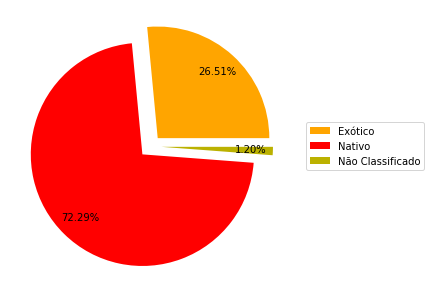

In [149]:
#Proporção de indivíduos arbóreos regenerantes nativos e exóticos no entorno palmeiras Livistona chinensis de 3 m de altura e no entorno delas.
regenerantes_por_origem = df_without_nan[df_without_nan['Área'] == 'Entorno']
regenerantes_por_origem = regenerantes_por_origem[~df['Espécie'].isin(['Pendente'] )]
regenerantes_por_origem = regenerantes_por_origem.groupby('Nativa', as_index=False)['Número'].count() 
regenerantes_por_origem = regenerantes_por_origem[regenerantes_por_origem > 0]
regenerantes_por_origem = regenerantes_por_origem.dropna()

labels = ['Exótico', 'Nativo', 'Não Classificado']

sizes =  regenerantes_por_origem['Número'].tolist()

explode = [0.1, 0.1, 0.1]

colors = ['#FFA500', '#FF0000', '#BBB100']

fig, ax = plt.subplots(figsize=(5, 5))
ax.axis('equal')

pie = ax.pie(sizes, explode=explode, colors=colors,
             autopct='%1.2f%%', pctdistance =0.80,textprops=dict(color="black"))

plt.legend(pie[0], labels, bbox_to_anchor=(1.5,0.5), loc="right")

plt.show()

/home/tania/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


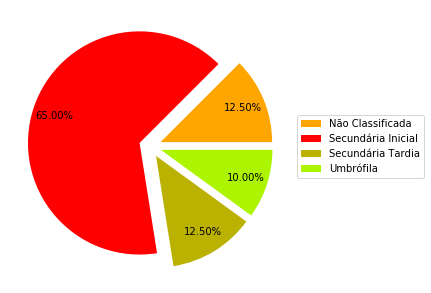

In [150]:
 #Proporção de indivíduos arbóreos regenerantes na COPA por ESTAGIO SUCESSIONAL
regenerantes_por_estagio = df_without_nan[df_without_nan['Área'] == 'Copa']
regenerantes_por_estagio = regenerantes_por_estagio[~df['Espécie'].isin(['Pendente'] )]
regenerantes_por_estagio = regenerantes_por_estagio.groupby('Estágio sucessional', as_index=False)['Número'].count() 
regenerantes_por_estagio = regenerantes_por_estagio[regenerantes_por_estagio > 0]
regenerantes_por_estagio = regenerantes_por_estagio.dropna()

labels = regenerantes_por_estagio['Estágio sucessional'].tolist()

sizes =  regenerantes_por_estagio['Número'].tolist()
labels
explode = [0.1, 0.1, 0.1, 0.1]

colors = ['#FFA500', '#FF0000', '#BBB100',  '#ACF400']

fig, ax = plt.subplots(figsize=(5, 5))
ax.axis('equal')

pie = ax.pie(sizes, explode=explode, colors=colors,
             autopct='%1.2f%%', pctdistance =0.80,textprops=dict(color="black"))

plt.legend(pie[0], labels, bbox_to_anchor=(1.5,0.5), loc="right")

plt.show()

In [151]:
labels

['Não Classificada', 'Secundária Inicial', 'Secundária Tardia', 'Umbrófila']

/home/tania/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


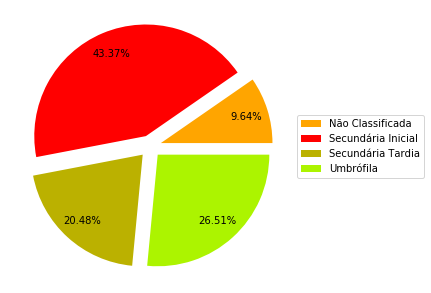

In [152]:
 #Proporção de indivíduos arbóreos regenerantes Pioneiros e Não Pioneiros no entorno de palmeiras Livistona chinensis de 3 m de altura e no entorno delas.
regenerantes_por_estagio = df_without_nan[df_without_nan['Área'] == 'Entorno']
regenerantes_por_estagio = regenerantes_por_estagio[~df['Espécie'].isin(['Pendente'] )]
regenerantes_por_estagio = regenerantes_por_estagio.groupby('Estágio sucessional', as_index=False)['Número'].count() 
regenerantes_por_estagio = regenerantes_por_estagio[regenerantes_por_estagio > 0]
regenerantes_por_estagio = regenerantes_por_estagio.dropna()

labels = regenerantes_por_estagio['Estágio sucessional'].tolist()

sizes =  regenerantes_por_estagio['Número'].tolist()

explode = [0.1, 0.1, 0.1, 0.1]

colors = ['#FFA500', '#FF0000', '#BBB100',  '#ACF400']

fig, ax = plt.subplots(figsize=(5, 5))
ax.axis('equal')

pie = ax.pie(sizes, explode=explode, colors=colors,
             autopct='%1.2f%%', pctdistance =0.80,textprops=dict(color="black"))

plt.legend(pie[0], labels, bbox_to_anchor=(1.5,0.5), loc="right")

plt.show()

In [153]:
labels

['Não Classificada', 'Secundária Inicial', 'Secundária Tardia', 'Umbrófila']

In [154]:
#Distribuição das espécies  regenerantes

#especies copa
all_copa = df_without_nan[df_without_nan['Área'] == 'Copa']
all_copa = all_copa[~all_copa['Espécie'].isin(['Pendente'] )]
all_copa = all_copa['Espécie']
all_copa = all_copa.drop_duplicates()

#especies entorno
all_entorno = df_without_nan[df_without_nan['Área'] == 'Entorno']
all_entorno = all_entorno[~all_entorno['Espécie'].isin(['Pendente'] )]
all_entorno = all_entorno['Espécie']
all_entorno = all_entorno.drop_duplicates()

#especies comuns nos dois grupos                     
comum_copa_entorno = all_copa[all_copa.isin(all_entorno)]

#especies exclusivas de determinada area
only_copa =  all_copa[~all_copa.isin(comum_copa_entorno)]
only_entorno =  all_entorno[~all_entorno.isin(comum_copa_entorno)]


In [155]:
#apenas copa

only_copa

3        Guarea macrophylla
67     Eugenia brasiliensis
139               Citrus sp
Name: Espécie, dtype: object

In [156]:
#apenas entorno
only_entorno

9          Mollinedia uleana
10         Allophylus edulis
12                Solanum sp
16         Ficus obtusifolia
20        Sloanea guianensis
56    Eugenia supraaxillaris
Name: Espécie, dtype: object

In [157]:
#especies em comum
comum_copa_entorno

0               Cupania oblongifolia
25                    Coffea arabica
26                    Euterpe edulis
30    Archontophoenix cunninghamiana
34              Psychotria suterella
62                Sorocea bonplandii
63              Myrciaria floribunda
Name: Espécie, dtype: object

In [158]:
#merge
only_copa_qtd = pd.DataFrame({'Área': ['Copa'],
                        'Quantidade': [only_copa.count()] })

only_entorno_qtd = pd.DataFrame({'Área': ['Entorno'],
                        'Quantidade': [only_entorno.count()] })

comum_copa_entorno_qtd = pd.DataFrame({'Área': ['Ambos'],
                        'Quantidade': [comum_copa_entorno.count()] })

merge = [only_copa_qtd,only_entorno_qtd, comum_copa_entorno_qtd]
resultado_merge = pd.concat(merge)

resultado_merge

,Área,Quantidade
0,Copa,3
0,Entorno,6
0,Ambos,7


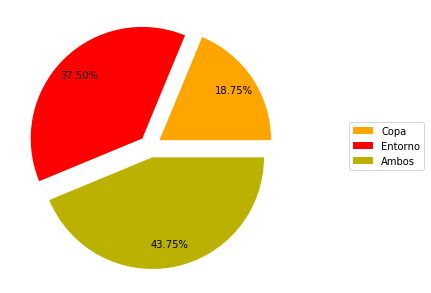

In [159]:
#grafico

labels = resultado_merge['Área'].tolist()

sizes =  resultado_merge['Quantidade'].tolist()

explode = [0.1, 0.1, 0.1]

colors = ['#FFA500', '#FF0000', '#BBB100']

fig, ax = plt.subplots(figsize=(5, 5))
ax.axis('equal')

pie = ax.pie(sizes, explode=explode, colors=colors,
             autopct='%1.2f%%', pctdistance =0.80,textprops=dict(color="black"))

plt.legend(pie[0], labels, bbox_to_anchor=(1.5,0.5), loc="right")

plt.show()

In [160]:
#Proporcao de individuos regenerantes na copa e no entorno 

#copa
copa_total = df_without_nan[df_without_nan['Área'] == 'Copa']
copa_total = copa_total[~copa_total['Espécie'].isin(['Pendente'] )]
copa_total = copa_total[['Espécie','Número', 'Área']]

copa_total_consolidada = pd.DataFrame({'Área': ['Copa'],
                        'Quantidade': [copa_total['Número'].count()] })

#entorno
entorno_total = df[df['Área'] == 'Entorno']
entorno_total = entorno_total[~entorno_total['Espécie'].isin(['Pendente'] )]
entorno_total = entorno_total[['Espécie','Número', 'Área']]

entorno_total_consolidado = pd.DataFrame({'Área': ['Entorno'],
                        'Quantidade': [entorno_total['Número'].count()] })

merge = [copa_total_consolidada, entorno_total_consolidado]
resultado_merge = pd.concat(merge)

resultado_merge


,Área,Quantidade
0,Copa,40
0,Entorno,83


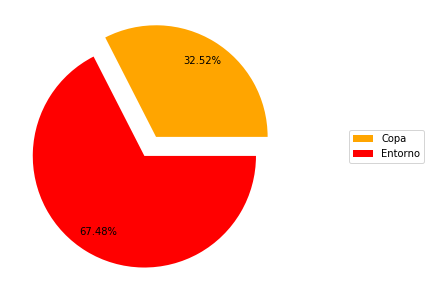

In [161]:
#Grafico

labels = resultado_merge['Área'].tolist()

sizes =  resultado_merge['Quantidade'].tolist()

explode = [0.1, 0.1]

colors = ['#FFA500', '#FF0000']

fig, ax = plt.subplots(figsize=(5, 5))
ax.axis('equal')

pie = ax.pie(sizes, explode=explode, colors=colors,
             autopct='%1.2f%%', pctdistance =0.80,textprops=dict(color="black"))

plt.legend(pie[0], labels, bbox_to_anchor=(1.5,0.5), loc="right")

plt.show()

In [162]:
#TESTES ESTATISTICOS
#Para as distribuicoes de altura e diametro das especies C.oblongifolia, C. arabica e E. edulis nas copas e no entorno

In [163]:
selected_species = df_without_nan[(df_without_nan['Espécie'] == 'Cupania oblongifolia') | 
                            (df_without_nan['Espécie'] == 'Coffea arabica') | 
                            (df_without_nan['Espécie'] == 'Euterpe edulis') ]

selected_species_copa = selected_species[selected_species['Área'] == 'Copa']

selected_species_entorno = selected_species[selected_species['Área'] == 'Entorno']

In [164]:
# 1 - Shapiro-Wilk Test (teste de normalidade) para os dados de ALTURA dos regenerantes sob COPAS
stat, p = shapiro(selected_species_copa['Altura (cm)'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# resultado
alpha = 0.05
if p > alpha:
    print('Grupo COPA tem distribuição normal  para dados de ALTURA (aceita H0)')
else:
    print('Grupo COPA não tem distribuição normal  para dados de ALTURA (rejeita H0)')

Statistics=0.483, p=0.000
Grupo COPA não tem distribuição normal  para dados de ALTURA (rejeita H0)


In [165]:
# 1 - Shapiro-Wilk Test (teste de normalidade) para os dados de ALTURA dos regenerantes no ENTORNO
stat, p = shapiro(selected_species_entorno['Altura (cm)'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# resultado
alpha = 0.05
if p > alpha:
    print('Grupo ENTORNO tem distribuição normal  para dados de ALTURA (aceita H0)')
else:
    print('Grupo ENTORNO não tem distribuição normal para dados de ALTURA (rejeita H0)')

Statistics=0.624, p=0.000
Grupo ENTORNO não tem distribuição normal para dados de ALTURA (rejeita H0)


In [166]:
#Teste Man-Whitney para Altura
stat, p = mannwhitneyu(selected_species_entorno['Altura (cm)'], selected_species_copa['Altura (cm)'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

#  resultado

alpha = 0.05

if p > alpha:
	print('Mesma distribuição para ALTURA(aceita H0)')
else:
	print('Diferentes distribuiçoes para ALTURA(rejeita H0), ou seja, existem diferenças significativas entre as duas condicoes')

Statistics=756.000, p=0.133
Mesma distribuição para ALTURA(aceita H0)


In [167]:
# 1 - Shapiro-Wilk Test (teste de normalidade) para os dados de DAP dos regenerantes sob COPAS
stat, p = shapiro(selected_species_copa['Dap (mm)'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# resultado
alpha = 0.05
if p > alpha:
    print('Grupo COPA tem distribuição normal  para dados de DAP (aceita H0)')
else:
    print('Grupo COPA não tem distribuição normal para dados de DAP(rejeita H0)')

Statistics=0.590, p=0.000
Grupo COPA não tem distribuição normal para dados de DAP(rejeita H0)


In [168]:
# 1 - Shapiro-Wilk Test (teste de normalidade) para os dados de DAP dos regenerantes no ENTORNO
stat, p = shapiro(selected_species_entorno['Dap (mm)'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# resultado
alpha = 0.05
if p > alpha:
    print('Grupo ENTORNO tem distribuição normal  para dados de DAP (aceita H0)')
else:
    print('Grupo ENTORNO não tem distribuição normal para dados de DAP(rejeita H0)')

Statistics=0.752, p=0.000
Grupo ENTORNO não tem distribuição normal para dados de DAP(rejeita H0)


In [169]:
#Teste Man-Whitney para DAP
stat, p = mannwhitneyu(selected_species_entorno['Dap (mm)'], selected_species_copa['Dap (mm)'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

#  resultado

alpha = 0.05

if p > alpha:
	print('Mesma distribuição para DAP(aceita H0)')
else:
	print('Diferentes distribuiçoes para DAP (rejeita H0), ou seja, existem diferenças significativas entre as duas condicoes')

Statistics=829.500, p=0.320
Mesma distribuição para DAP(aceita H0)
